# this is used to look at my 2layerXY model in Tibet

The original 2layer model has the lower crustal dip contrained to 0, this new 2layerXY model has dip freely perturbed in both upper and mid-to-lower crust. 



In [ ]:
from IPython.display import Image
import os
import pycpt


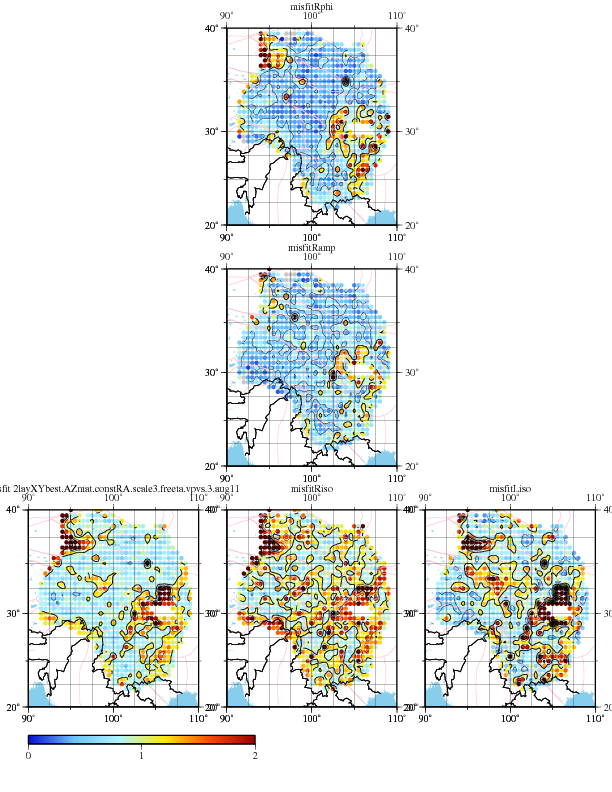

In [9]:

dir = "/projects/jixi7887/work/YunNanTibet/plot/plot_map"

#-- misfit map for the 2layerXY model
filename = '%s/ps_misfit/\
misfit_2layXYbest.AZmat.constRA.scale3.freeta.vpvs.3.aug11.AZmat.constRA.scale3.freeta.vpvs.3.aug11.ps'%(dir)
os.system("convert %s temp.png"%(filename))
Image(filename="temp.png")



The misfit map of 2layerXY looks similar to previous 3layer model. Indicating good fitting overall.

Still, we have bad fitting in the basins, because no anisotropy is introduced in the sediment. That's why we want to introduce H/V for the inversion. 


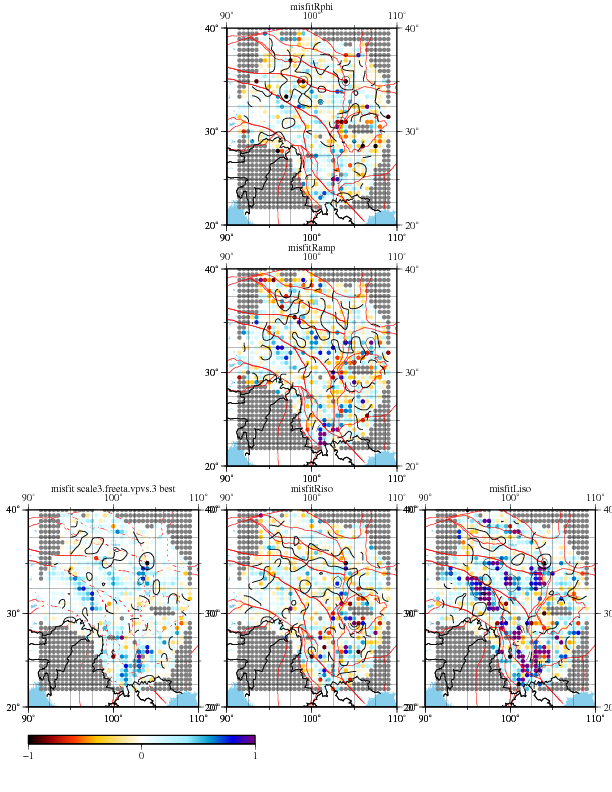

In [10]:
#-- misfit difference map between the 1lay and 2layerXY model,  2layerX0 and 2layerXY model
filename = "%s/ps_misfit/misfit_diff_scale3.freeta.vpvs.3.aug11.best.2layXY.ps"%(dir)
os.system("convert %s temp.png"%(filename))
Image(filename="temp.png")

because 2layerXY has more freedom than 1layer model, the misfit is decreased for almost all the study region



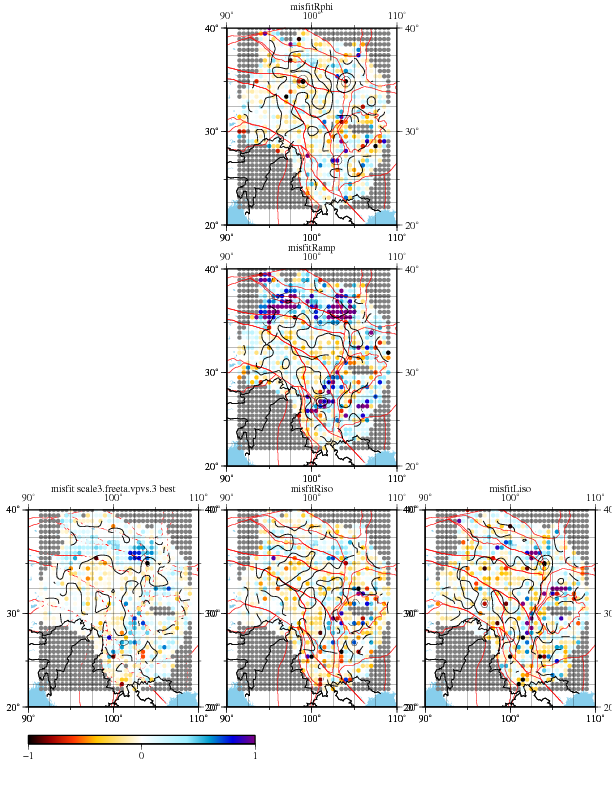

In [11]:
#-- misfit difference map between the 2layX0 and 2layerXY model,  2layerX0 and 2layerXY model
filename = "%s/ps_misfit/misfit_diff_scale3.freeta.vpvs.3.aug11.best.2lay2layXY.ps"%(dir)
os.system("convert %s temp.png"%(filename))
Image(filename="temp.png")


The misfit difference map shows improvement to the 1layer model for region inside Tibet

And improvement to the 2layerX0 model for region at the edge of Tibet

## Next plot the map for dip, what does it look like?

get map values:
/projects/jixi7887/work/YunNanTibet/plot/plot_map
csh plot_map_view_AGU_v4.AZcm.depth.csh
(python ./get_info_map_CstMat_v2.2.AZcm.py.copy2 ${file} $invid $flagBest $surffix 1)

==> 
ps_para_map_inv1/para_map_inv_v1.2.1.scale3.3laytheta.freeta.AZmat.constRA_Tibet_v1_laytheta.20disc.XYdip.aug11.vpvs.3_avg__phigp0.depth.point.theta.AZcm.ps

/projects/jixi7887/work/YunNanTibet/plot/plot_map/merge_no_map.py
/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/plot_merged_no_map.csh


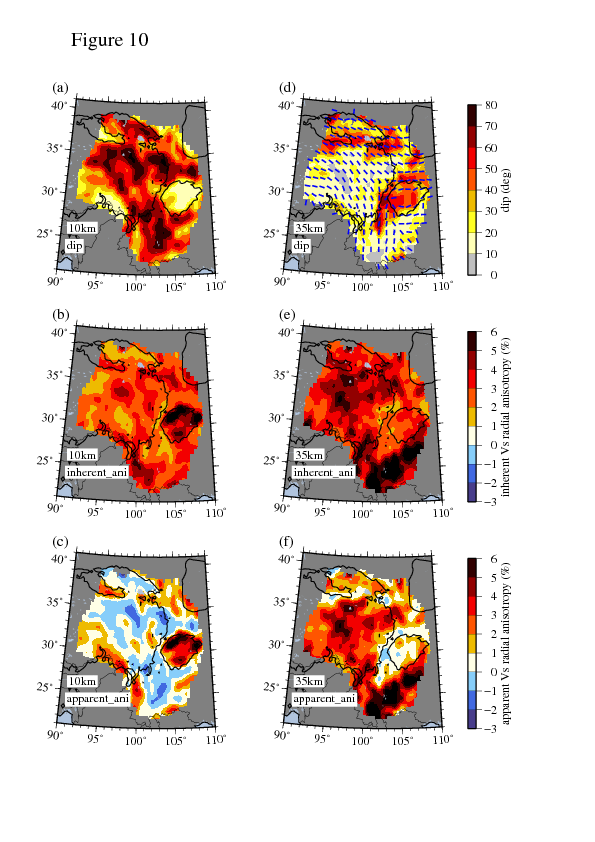

In [60]:
#--- the model obtained from the 2layerXYdip inversion. 
filename = "/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/map_no_merge.ps"
os.system("convert %s temp.png"%(filename))
Image(filename="temp.png")

The figure above shows the model obtained from the new 2layer_XYdip inverseion. The dip has two layers, with a discontinuity placed at 1/3 Moho depth. The dips are free paramters in both layres. 

Overall, at 10km, the dip is large across most of the study region, except the Sichuan Basin, Qaidam Basin, and part of Lasha terrane. This results in negative apparent radial anisotropy across most of the study area, and positive apparent anisotropy inside the basins (This makes sense!). 

At 35km depth, the dip is shallow across most area, except the N and E edges of Tibet. This indicate large apparent radial anisotropy in most region, and small to negative apparent radial anisotropy at the N and E edges of Tibet. The YunNan region has extremely strong apparent radial anisotropy, not sure why ...

Let's compare it with the previous 1layer & 2layer combined model


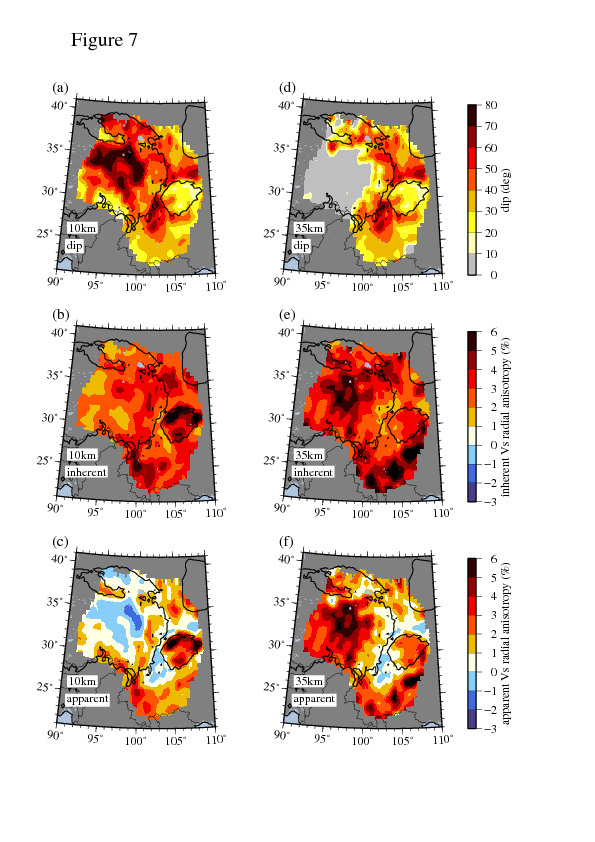

In [13]:
#--- the model obtained from the 1layer & 2layer inversion. Only location that prefers 2layer model are presented with 2layer model reslt 
filename = "/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/map_merge.ps"
os.system("convert %s temp.png"%(filename))
Image(filename="temp.png")

The figure above shows my previous result (used in the paper draft). It is obtained by combining the 1layer (depth-constant orientation) and 1layer (depth-varying orientation with flat dip in the middle to lower crust).

Overall, these two results (2layerXY, and 1layer2layer combined) look very similar to each other. And we can probably use the 2layer_XYdip result directly for the paper!

# plot the data fitting at sample locatoins
plot the iso, 1lay, and 2layXYdip

/projects/jixi7887/work/YunNanTibet/Analyze/get_LRdiff/do_get_diff.csh ==> compute LR difference

Then make plot(plot_point/plot_fit_compare_paramod.csh or plot_draft/plot_local_disp.csh)
#
plot the dip_upper - dip_lower in a map, see how does it look like
plot the model-depth variation
plot the disp fitting
plot the model prior & posterior distribution

#
99_36: dip_upper>dip_lower, large anisotropy

102_36: dip_upper< dip_lower. some anisotropy

101_36: dip_upper~dip_lower, some (apparent) anisotropy

102_30: dip_upper~dip_lower, alsmost no apparent radial anisotropy

#

Just finished recomputing all the averages. So need to redo all those information-exrtaction related to average model. 





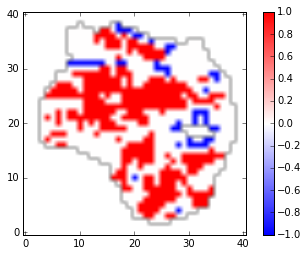

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# the file that contains the model information at each depth (misfit, gamma, epsi, dip, )
fileInfo="/projects/jixi7887/work/YunNanTibet/plot/plot_map/para_map_info_inv1/para_map_inv_v1.2.1.scale3.3laytheta.freeta.AZmat.constRA_Tibet_v1_laytheta.20disc.XYdip.aug11.vpvs.3__phigp0.AZcm.txt.depth_value"
colDip10=65 # the column of dip at 10km depth. starts from 0
colDip35=105 # at 35km depth

#!head -1 $fileInfo

lonmin = 90.; lonmax=110.; latmin= 21.; latmax=41.; step=0.5
Nlon=int((lonmax-lonmin)/step+1.001)
Nlat=int((latmax-latmin)/step+1.001)

def initArray(Nlon,Nlat):
    aArray=np.empty((Nlat,Nlon)) 
    aArray.fill(None)
    return aArray
dipLst1=initArray(Nlon,Nlat)
dipLst2=initArray(Nlon,Nlat)
dipULst1=initArray(Nlon,Nlat)
dipULst2=initArray(Nlon,Nlat)
signLst=initArray(Nlon,Nlat)

dip10Lst=[];
for line in open(fileInfo):
    l=line.rstrip().split()
    lon=float(l[1]); lat=float(l[2])
    ilon=int((lon-lonmin)/step+0.001)
    ilat=int((lat-latmin)/step+0.001)
    dip1=float(l[colDip10]); dipU1=float(l[colDip10+1]) # dip and its uncertainty
    dip2=float(l[colDip35]); dipU2=float(l[colDip35+1])
    dipLst1[ilat][ilon]=dip1; dipULst1[ilat][ilon]=dipU1
    dipLst2[ilat][ilon]=dip2; dipULst2[ilat][ilon]=dipU2
    diff=dip1-dip2
    diffUnc=pow(pow(dipU1,2)+pow(dipU2,2),0.5)
    if(diff>0 and diff>diffUnc):
        sign=1
    elif(diff<0 and diff<-diffUnc):
        sign=-1
    else:
        sign=0
    signLst[ilat][ilon]=sign

    
map1=signLst#dipLst1-dipLst2
plt.imshow(map1,origin='lower', cmap='bwr')
plt.colorbar()
plt.show()



Figure above shows the comparison between dipUpper-dipLower with their corresponding uncertainty. 

Red & blue indicate significant difference (amplitude of diff larger than uncertainty). White indicate insignificant difference

In [41]:

#--- the figure at 96_33 and 101_36 (and 105_25)
filename1="/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/point_dip_appAni.2layXY.ps"
filename2="/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/point_disp.2layXY.ps"
filenamePost35km="/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/point_prior_post_9633_35.2layXY.ps"
filenamePost10km="/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/point_prior_post_9633_10.2layXY.ps"



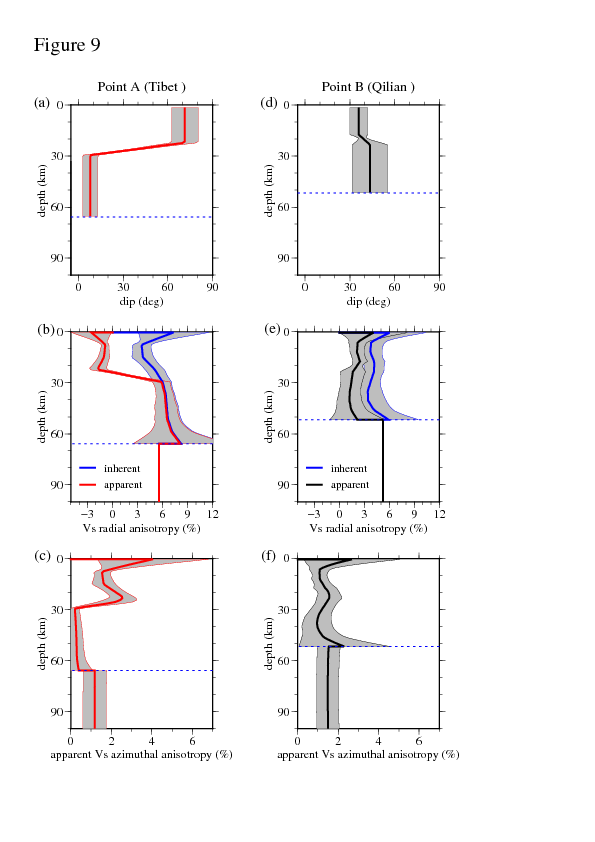

In [58]:
os.system("convert %s temp.png"%(filename1))
Image(filename="temp.png")

Figure above shows the depth variation of the inverted model (both from 2layerXYdip inversion) at 96_33 and 101_36

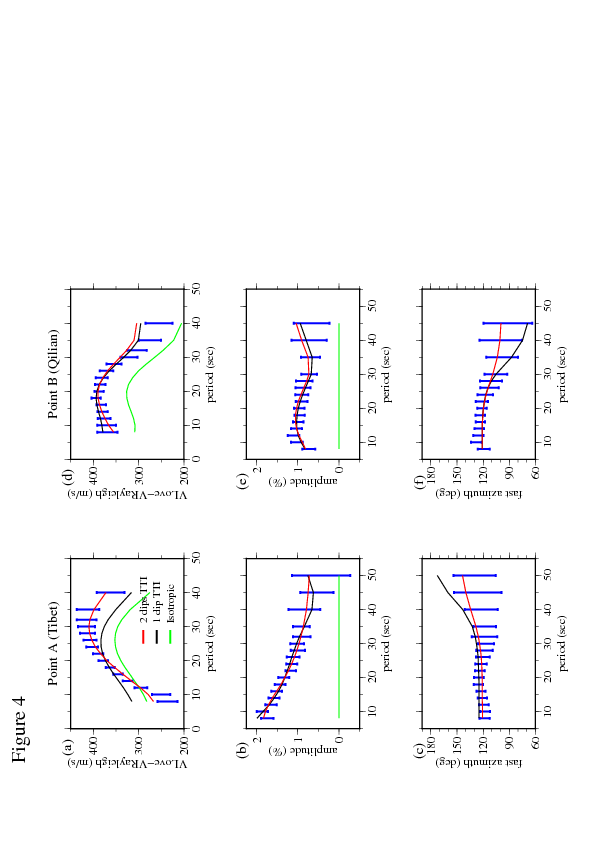

In [51]:
os.system("convert %s temp.png"%(filename2))
Image(filename="temp.png")


figure above shows the fit of data at point 96_33, 101_36, and 105_25

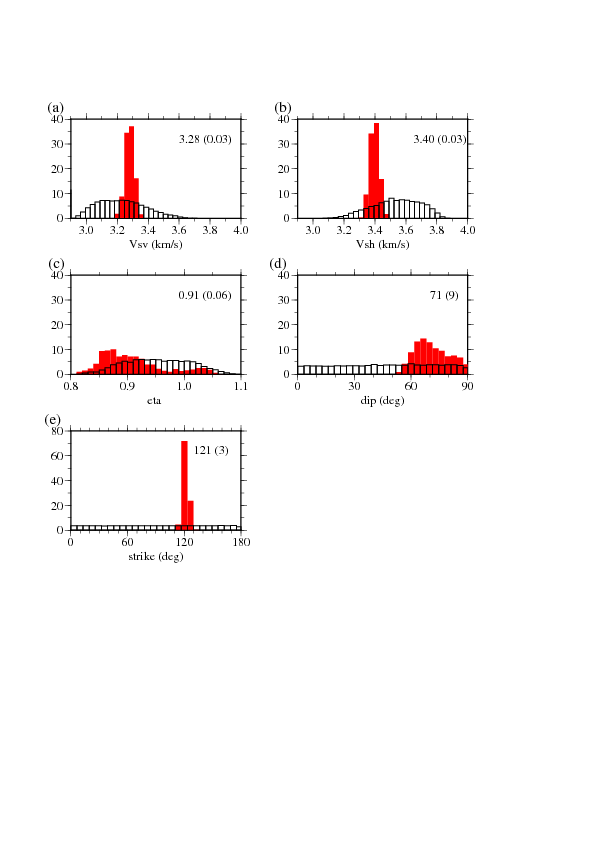

In [73]:
os.system("convert %s temp.png"%(filenamePost10km))
Image(filename="temp.png")

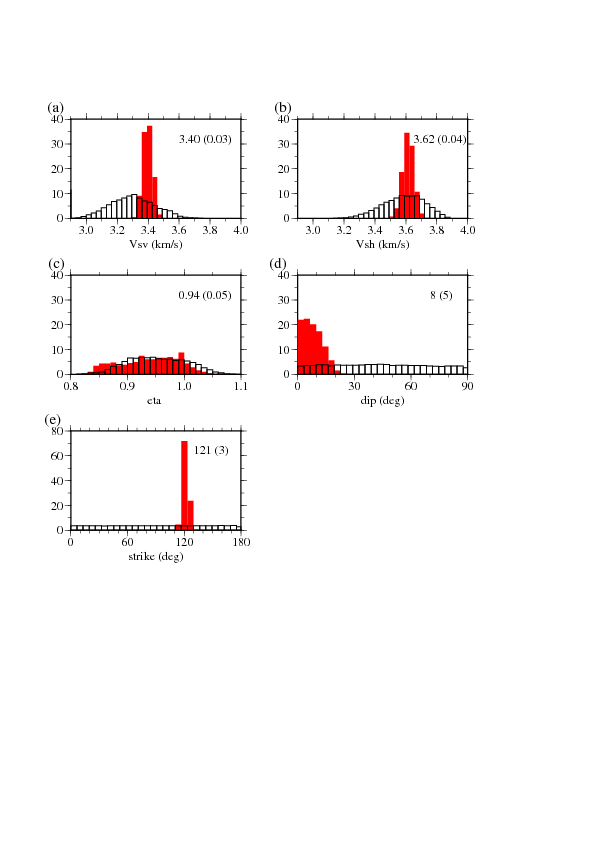

In [56]:
os.system("convert %s temp.png"%(filenamePost35km))
Image(filename="temp.png")


Figures above show he posterior distributions for point 96_33 at 10km and 35km. 

At 35km, the dip does want to be 0

In [49]:
filenm1 = "/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/map_no_merge.ps" # replotted model feature
filenm2 = "/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/map_no_merge_unc.ps"# model feature uncertainty
filenm3 = "/projects/jixi7887/work/YunNanTibet/plot/plot_paper_draft/ps/map_misfit.ps" # best model misfit 



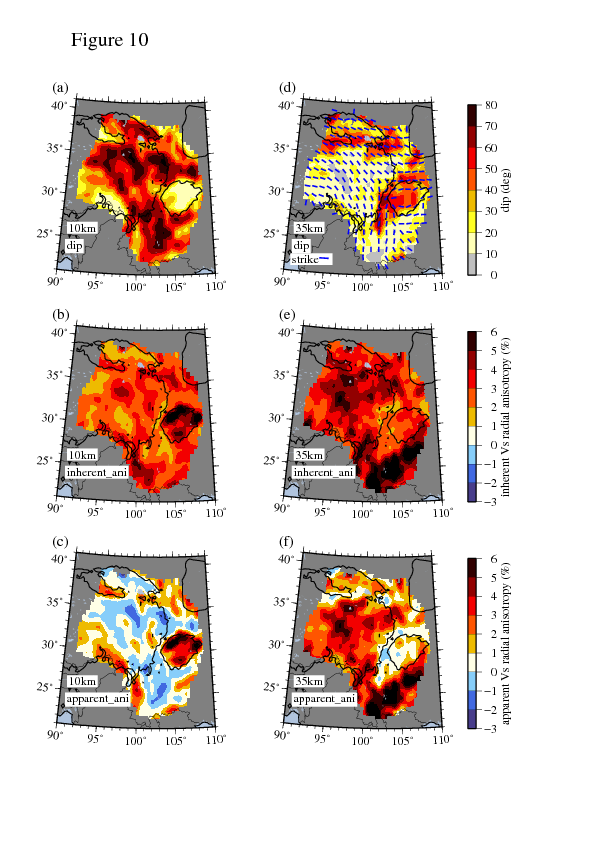

In [71]:
os.system("convert %s temp.png"%(filenm1))
Image(filename="temp.png")

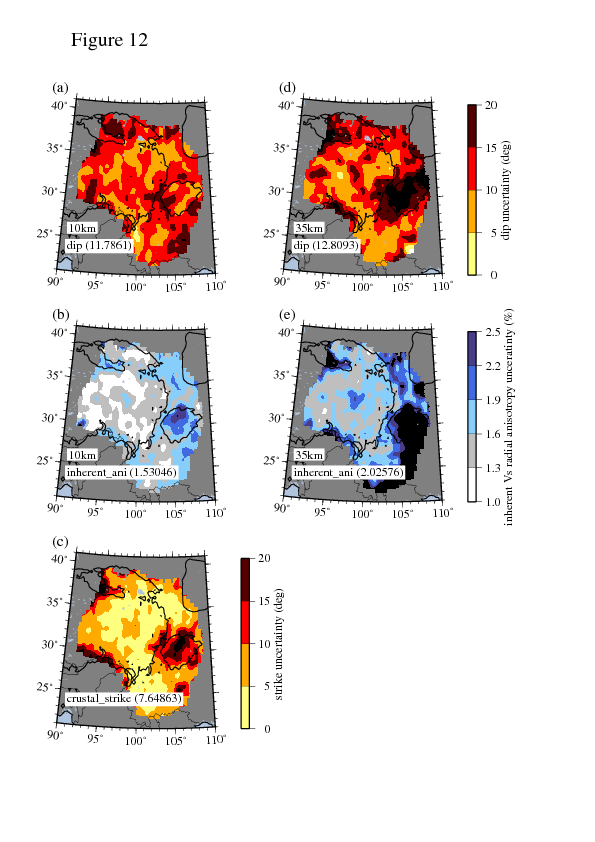

In [75]:
os.system("convert %s temp.png"%(filenm2))
Image(filename="temp.png")

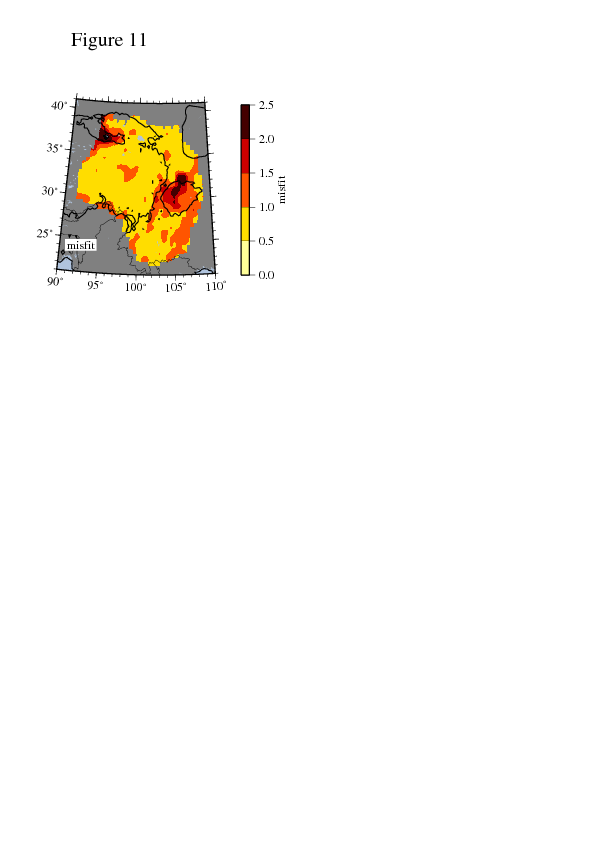

In [63]:
os.system("convert %s temp.png"%(filenm3))
Image(filename="temp.png")

## a very interesting plot: show you the slope of the Ray amplitude curve

In [76]:
filenm4 = "/projects/jixi7887/work/YunNanTibet/plot/plot_map/ampdisp_shape.ps"

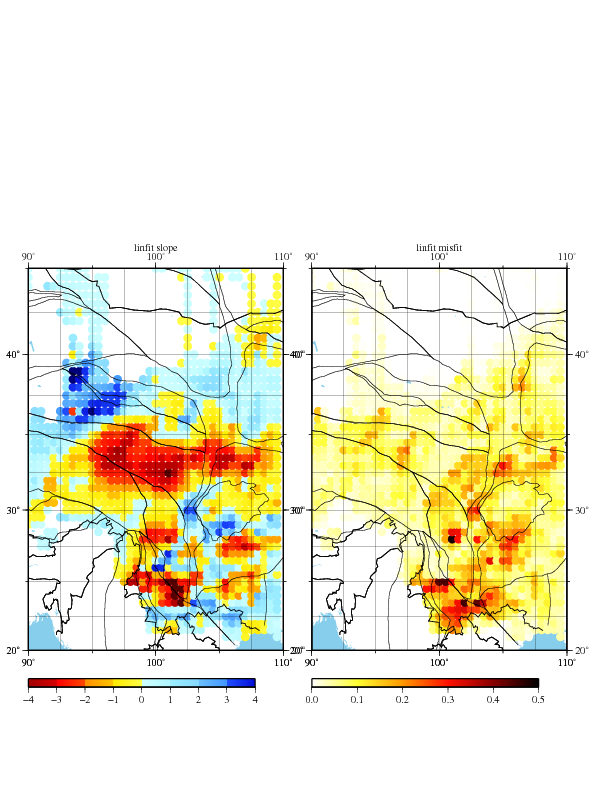

In [77]:
os.system("convert %s temp.png"%(filenm4))
Image(filename="temp.png")